In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pySankey.sankey import sankey

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [3]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [4]:
colors = {
    "INDIA": "#f71b1b",
    "BRAZIL": "#1b7ef7",
    "JAPAN": "#f3f71b",
    "GERMANY": "#12e23f",
    "USA": "#f78c1b"
}

## Import Data

### Production Quantity by From/To

In [5]:
# Production Quantity
df_prod = pd.read_csv('In/Sankey data.csv', index_col = 0, sep = ',')
print('{:,} lines'.format(len(df_prod)))

25 lines


## Process Data Frame
### Color mapping

In [6]:
colors = {
    "INDIA": "#f71b1b",
    "BRAZIL": "#1b7ef7",
    "JAPAN": "#f3f71b",
    "GERMANY": "#12e23f",
    "USA": "#f78c1b"
}

### Build the plot

In [7]:
# Keeping only positive values
df_plot = df_prod[df_prod['units']>0].reset_index()
df_plot.head()

,index,source,target,units
0,12,JAPAN,JAPAN,1500000.0
1,15,BRAZIL,USA,1250000.0
2,18,BRAZIL,BRAZIL,145000.0
3,20,INDIA,USA,1550000.0
4,21,INDIA,GERMANY,90000.0


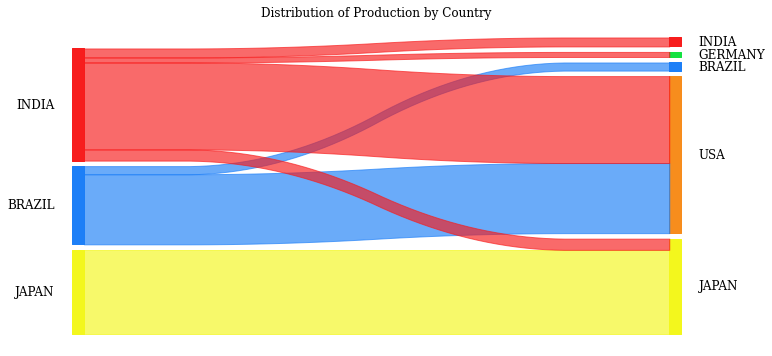

In [8]:
# Plot
sankey(
    left = df_plot["source"], right = df_plot["target"], 
    leftWeight= df_plot["units"], rightWeight = df_plot["units"], fontsize=12, colorDict=colors
)
plt.gcf().set_size_inches((12,6))
plt.title('Distribution of Production by Country')
plt.show()